In [1]:
import os, time, math
import math
from math import sqrt
#from ann_visualizer.visualize import ann_viz
import numpy as np
import pandas as pd
import seaborn as sns
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.models import Model
#from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline
from matplotlib import pyplot as plt
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, tree, ensemble
import sklearn.metrics as metrics 
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
#from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
from xgboost import XGBRegressor
import math
#from tune_sklearn import TuneGridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
reg_decision_model=DecisionTreeRegressor()
from sklearn.model_selection import StratifiedKFold
from hyperopt import tpe,hp,Trials
import xgboost as xgb
from hyperopt.fmin import fmin
import geopandas as gpd

C:\Users\mmmiah\AppData\Local\ESRI\conda\envs\geo_env\Lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_12236\1690410514.py:56: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (htt

In [77]:
# import necessary library
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
import re
import numpy as np
import geopandas as gpd
from shapely.geometry import Point # Point class
from shapely.geometry import shape
import networkx as nx
import osmnx as ox
import os 
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay
import shapely.geometry as geom
import shapely.wkt

In [3]:
# Helper Function
def rmse(predictions, targets):
    differences = predictions - targets                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^
    return rmse_val

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [4]:
# read data
data=pd.read_csv("D:/Bike Exposure/Modeling/Model_clean_data_july10.csv")
data.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_12236\2078289719.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("D:/Bike Exposure/Modeling/Model_clean_data_july10.csv")


,Unnamed: 0,county,X,ID,location,Lat,Long,year,ATT,no_of_months_data_collected,...,pctatleastbachelors_h,totatleastbachelorspersqmi_h,pctnoveh_h,totnovehpersqmi_h,popdensitysqmi_h,hshlddensitysqmi_h,medhhincome_h,Mean,std,outlier
0,1,Alameda,122,8578.0,urban,37.849934,-122.288850,2018,11376,1.0,...,0.622015,4297.650441,0.129288,528.406127,8836.298555,4087.036520,96990.667535,54347.865954,57876.852958,False
1,2,Alameda,285,21805.0,urban,37.814124,-122.255859,2019,12785,7.0,...,0.655478,13075.566793,0.188265,2395.066909,23080.419282,12721.814900,88387.488296,54347.865954,57876.852958,False
2,3,Alameda,286,21806.0,urban,37.814124,-122.255859,2019,24424,7.0,...,0.655478,13075.566793,0.188265,2395.066909,23080.419282,12721.814900,88387.488296,54347.865954,57876.852958,False
3,4,Alameda,128,14389.0,urban,37.533787,-122.079500,2017,69539,12.0,...,0.695390,40.415274,0.013903,0.350566,85.638312,25.215725,198237.000000,54347.865954,57876.852958,False
4,5,Alameda,129,14389.0,urban,37.533787,-122.079500,2018,77973,12.0,...,0.695390,40.415274,0.013903,0.350566,85.638312,25.215725,198237.000000,54347.865954,57876.852958,False


In [5]:
lv=data.loc[data["ATT"]<=2000]
lv['type']

11      eco_permanent
313        short_term
349        short_term
530        short_term
748        short_term
836        short_term
898        short_term
906        short_term
1283    eco_permanent
1287    eco_permanent
1321    eco_permanent
1335    eco_permanent
1339    eco_permanent
1366       short_term
2441    eco_permanent
2618    eco_permanent
2780    eco_permanent
2830    eco_permanent
2873    eco_permanent
2883    eco_permanent
2963    eco_permanent
2985    eco_permanent
2990    eco_permanent
3027    eco_permanent
3042    eco_permanent
3053    eco_permanent
3064    eco_permanent
3065    eco_permanent
3197    eco_permanent
3398    eco_permanent
Name: type, dtype: object

In [6]:
data['ATT'].describe()

count    4.221000e+03
mean     6.137795e+04
std      9.788311e+04
min      1.030000e+02
25%      1.377700e+04
50%      3.005300e+04
75%      6.596900e+04
max      1.183616e+06
Name: ATT, dtype: float64

In [7]:
per=data.loc[data['type']=='eco_permanent']
short=data.loc[data['type']=='short_term']

In [8]:
pd.options.display.float_format = '{:.2f}'.format
per['ATT'].describe()

count       661.00
mean     128381.12
std      187501.82
min         103.00
25%       19622.00
50%       50596.00
75%      150724.00
max     1183616.00
Name: ATT, dtype: float64

In [9]:
short['ATT'].describe()

count     3560.00
mean     48937.20
std      62066.56
min       1255.00
25%      13434.25
50%      27512.00
75%      58462.75
max     718001.00
Name: ATT, dtype: float64

In [10]:
short.groupby(['Leg','year'])['ATT'].describe()

count     mean      std     min      25%      50%      75%       max
Leg year                                                                      
E   2014  64.00 52988.31 56718.12 5981.00 13543.25 26930.00 69675.75 242117.00
    2015  83.00 55454.67 56001.00 3623.00 18843.00 34898.00 73481.00 281814.00
    2016 318.00 65892.90 99998.15 3511.00 17202.75 31332.50 71043.50 718001.00
    2017 101.00 40994.07 35826.56 2717.00 16413.00 29631.00 53586.00 172787.00
    2018 246.00 45120.98 48731.43 1900.00 13394.00 27881.50 57759.00 269297.00
    2019  74.00 24866.39 27059.93 4149.00  9525.75 14659.00 29282.25 150349.00
N   2014  53.00 62867.81 69560.33 4930.00 15675.00 30982.00 97714.00 253821.00
    2015  76.00 58348.57 61811.77 3436.00 16327.75 35836.00 67878.25 260205.00
    2016 339.00 56886.78 60012.82 1686.00 16025.00 36989.00 72177.50 302922.00
    2017 138.00 35962.92 32542.13 3021.00 12536.00 26183.00 46528.25 179972.00
    2018 260.00 39946.68 44899.87 1654.00 11208.00 23019.50 49983.75 224730.00
    2019  79.00 19609.67 17274.41 3043.00  8730.50 14488.00 27379.00  99170.00
S   2014  46.00 54723.74 70510.56 3813.00  9549.50 20203.00 84101.50 285525.00
    2015  85.00 55419.47 61424.32 5408.00 13027.00 28283.00 66475.00 281814.00
    2016 294.00 61273.99 61059.92 3076.00 19299.75 40619.00 83122.25 376769.00
    2017 114.00 41227.62 39927.72 1255.00 13181.25 25977.00 58614.75 183890.00
    2018 235.00 39931.78 44291.97 2985.00 11400.50 23263.00 48650.00 240072.00
    2019  76.00 23066.24 26649.85 3840.00  9012.50 17083.50 27557.25 205571.00
W   2014  72.00 54802.65 62952.77 5084.00 15500.75 24368.50 63977.00 264856.00
    2015  78.00 44736.97 41867.37 3430.00 17057.25 32864.50 59430.75 260508.00
    2016 312.00 63277.22 95114.53 3332.00 16106.25 31494.00 67955.50 693513.00
    2017 117.00 36388.91 30897.33 1510.00 17450.00 27978.00 44992.00 154539.00
    2018 223.00 44966.75 51259.49 1280.00 12214.00 26717.00 54833.50 296537.00
    2019  77.00 22034.04 25571.56 3599.00  7712.00 13223.00 25849.00 163462.00

In [11]:
track=data[['tdg_id','Leg','county', 'year','ATT']]
track['index']=track.index
track.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_12236\4243440442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track['index']=track.index


,tdg_id,Leg,county,year,ATT,index
0,208578,NaN,Alameda,2018,11376,0
1,221803,NaN,Alameda,2019,12785,1
2,221803,NaN,Alameda,2019,24424,2
3,214389,NaN,Alameda,2017,69539,3
4,214389,NaN,Alameda,2018,77973,4


In [12]:
# Clean the data
rf_data=data.fillna(0)
rf_data=rf_data._get_numeric_data()
nan_values = rf_data. isna()
nan_columns = nan_values. any()
columns_with_nan = rf_data. columns[nan_columns]. tolist()
print(columns_with_nan)

[]


In [13]:
rf_data0=rf_data.drop(rf_data. columns[nan_columns]. tolist(),axis=1)
rf_data0.head()

,Unnamed: 0,X,ID,Lat,Long,year,ATT,no_of_months_data_collected,AADB,ATT.in.Million,...,pctatleastbachelors_h,totatleastbachelorspersqmi_h,pctnoveh_h,totnovehpersqmi_h,popdensitysqmi_h,hshlddensitysqmi_h,medhhincome_h,Mean,std,outlier
0,1,122,8578.00,37.85,-122.29,2018,11376,1.00,31,0.01,...,0.62,4297.65,0.13,528.41,8836.30,4087.04,96990.67,54347.87,57876.85,False
1,2,285,21805.00,37.81,-122.26,2019,12785,7.00,35,0.01,...,0.66,13075.57,0.19,2395.07,23080.42,12721.81,88387.49,54347.87,57876.85,False
2,3,286,21806.00,37.81,-122.26,2019,24424,7.00,67,0.02,...,0.66,13075.57,0.19,2395.07,23080.42,12721.81,88387.49,54347.87,57876.85,False
3,4,128,14389.00,37.53,-122.08,2017,69539,12.00,191,0.07,...,0.70,40.42,0.01,0.35,85.64,25.22,198237.00,54347.87,57876.85,False
4,5,129,14389.00,37.53,-122.08,2018,77973,12.00,214,0.08,...,0.70,40.42,0.01,0.35,85.64,25.22,198237.00,54347.87,57876.85,False


In [14]:
data['fc_draft'].unique()

array([7, 2, 3, 4, 5, 1, 6], dtype=int64)

In [17]:
list(rf_data0.columns)

['Unnamed: 0',
 'X',
 'ID',
 'Lat',
 'Long',
 'year',
 'ATT',
 'no_of_months_data_collected',
 'AADB',
 'ATT.in.Million',
 'matched_seg_id',
 'segment_id',
 'tdg_id',
 'lrs_cal_id',
 'bikes_proh',
 'int_tdg_id',
 'loc_id',
 'seg_counter',
 'fc_draft',
 'speed',
 'slope',
 'empnum_density_t',
 'geom_length',
 'adt_amt',
 'truck_adt_amt',
 'rt_lanes_amt',
 'lt_lanes_amt',
 'rt_trav_way_width',
 'rt_i_shd_tot_width',
 'rt_o_shd_tot_width',
 'lt_trav_way_width',
 'lt_i_shd_tot_width',
 'lt_o_shd_tot_width',
 'near_strava_id',
 'empnum_density_q',
 'empnum_density_h',
 'near_univ_miles',
 'near_large_univ_miles',
 'forward_trip_count',
 'reverse_trip_count',
 'forward_commute_trip_count',
 'reverse_commute_trip_count',
 'forward_leisure_trip_count',
 'reverse_leisure_trip_count',
 'forward_average_speed',
 'reverse_average_speed',
 'index',
 'ATT.in.Thousands',
 'rowIndex',
 'primary',
 'secondary',
 'tertiary',
 'residential',
 'trunk',
 'secondary_link',
 'unclassified',
 'speed_0_25',
 '

In [18]:
model_data=rf_data0[['ATT','Stv_commute_adb', 'Stv_leisure_adb', 'Stv_Ave_speed','pctbiketowork_q',
                     'totatleastbachelorspersqmi_h','totnovehpersqmi_h','hshlddensitysqmi_h','popdensitysqmi_h','totwhitepersqmi_t',
                     'tertiary','speed', 'slope', 'empnum_density_t','Principal_Arterial', 'Minor_Arterial', 
                     'Major_Collector','Minor_Collector', 'Local','near_univ_miles', 'near_large_univ_miles','primary','secondary', 'residential','path',
       'bike_lane', 'bike_route', 'cycle_track', 'trail','dist_subway', 'dist_amtrak', 'dist_busstop',
 'dist_ferry','exist_bike_parking_q','pctlowintensity_h','pct_low_wage','dist_water','d1a','d3apo','d3b', 'd3bpo4','d5br',
 'd5be']]

In [19]:
# General description of data
model_data[['path', 'secondary','Minor_Arterial','Principal_Arterial','Local','residential','bike_lane', 'bike_route']].describe()

,path,secondary,Minor_Arterial,Principal_Arterial,Local,residential,bike_lane,bike_route
count,4221.00,4221.00,4221.00,4221.00,4221.00,4221.00,4221.00,4221.00
mean,0.05,0.29,0.32,0.29,0.25,0.18,0.18,0.12
std,0.23,0.45,0.47,0.45,0.43,0.39,0.38,0.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [21]:
# General description of data
data[['Stv_commute_adb', 'Stv_leisure_adb', 'Stv_Ave_speed','pctbiketowork_q',
                     'totatleastbachelorspersqmi_h','totnovehpersqmi_h','pctnoveh_h','hshlddensitysqmi_t','popdensitysqmi_h','totwhitepersqmi_t',
                     'tertiary','speed','speed_0_25','speed_21_35','speed_greater_than_35', 'slope', 'empnum_density_t','near_univ_miles', 'near_large_univ_miles','dist_subway', 'dist_amtrak', 'dist_busstop',
 'dist_ferry','exist_bike_parking_q','pctlowintensity_h','pct_low_wage','dist_water','d1a','d3apo','d3b', 'd3bpo4','d5br',
 'd5be']].describe()                    

,Stv_commute_adb,Stv_leisure_adb,Stv_Ave_speed,pctbiketowork_q,totatleastbachelorspersqmi_h,totnovehpersqmi_h,pctnoveh_h,hshlddensitysqmi_t,popdensitysqmi_h,totwhitepersqmi_t,...,exist_bike_parking_q,pctlowintensity_h,pct_low_wage,dist_water,d1a,d3apo,d3b,d3bpo4,d5br,d5be
count,4221.00,4221.00,4221.00,4211.00,4211.00,4211.00,4211.00,4211.00,4211.00,4211.00,...,4221.00,4211.00,4215.00,4221.00,4215.00,4215.00,4215.00,4215.00,4215.00,4215.00
mean,2.66,9.02,9.89,0.02,2876.56,691.49,0.11,3647.55,8986.27,4597.30,...,0.33,0.15,0.21,1.28,6.30,16.88,129.98,37.10,154577.83,91959.42
std,9.21,28.79,4.05,0.04,3993.54,1753.46,0.11,4206.85,7867.66,4361.36,...,0.47,0.10,0.06,0.94,8.00,8.40,102.20,42.36,240849.70,151448.73
min,0.00,0.00,0.00,0.00,0.70,0.00,0.00,0.00,2.28,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-99999.00,-99999.00
25%,0.05,0.29,7.69,0.00,473.28,49.93,0.04,1122.42,3530.82,1746.81,...,0.00,0.07,0.17,0.51,1.75,10.60,63.95,7.11,6897.00,4160.00
50%,0.35,1.71,10.46,0.01,1460.89,159.38,0.07,2463.91,7031.50,3608.94,...,0.00,0.14,0.21,1.13,3.89,17.23,114.80,20.85,43659.00,37680.00
75%,1.64,6.05,12.57,0.03,3396.66,529.06,0.14,4440.74,12263.72,5918.33,...,1.00,0.21,0.25,1.85,7.46,22.48,169.55,53.16,313979.00,181774.00
max,132.26,352.73,39.95,0.33,29818.47,21567.94,0.70,36186.13,53096.52,29539.31,...,1.00,0.55,0.43,5.59,91.59,50.40,832.59,240.03,1128813.00,923878.00


In [22]:
# split data into X dataframe and Y dataframe:
X_data = model_data.drop("ATT", axis=1)
Y_data = model_data["ATT"]
print(f"X_data.shape: {X_data.shape} Y_data.shape: {Y_data.shape}")
features = model_data.drop("ATT", axis=1)
feature_list = list(features.columns)
X = np.asarray(X_data)
Y = np.asarray(Y_data)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=94704)

X_data.shape: (4221, 42) Y_data.shape: (4221,)


In [23]:
# find best hyper parameter
from hyperopt import fmin, tpe, hp, anneal, Trials
random_state=94704
n_iter=500
num_folds=10
kf = KFold(n_splits=num_folds)

def rf_mse_cv(params, random_state=random_state, cv=kf, X=X, Y=Y):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
             'min_samples_leaf':int(params['min_samples_leaf']),
             'min_samples_split':int(params['min_samples_split'])
             }
    
    # we use this params to create a new RF Regressor
    model = RandomForestRegressor(random_state=random_state, **params)
    score = -cross_val_score(model, X, Y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1,error_score='raise').mean()

    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',50,2000),
           'max_depth':hp.uniform('max_depth',2,150),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,12)}
    best=fmin(fn=rf_mse_cv,space=params,algo=tpe.suggest,trials=trial,max_evals=n_iter,rstate=np.random.default_rng(random_state))
    return best

trial=Trials()
best=optimize(trial)

100%|█████████████████████████████████████████████| 500/500 [9:58:46<00:00, 71.85s/trial, best loss: 5726456997.092172]


In [24]:
print(best)

{'max_depth': 135.42038698639024, 'min_samples_leaf': 1.1908631809063017, 'min_samples_split': 10.198944702608093, 'n_estimators': 114.95470143555319}


In [25]:
TID=[t['tid'] for t in trial.trials]
Loss=[t['result']['loss'] for t in trial.trials]
maxd=[t['misc']['vals']['max_depth'][0] for t in trial.trials]
nest=[t['misc']['vals']['n_estimators'][0] for t in trial.trials]
min_ss=[t['misc']['vals']['min_samples_split'][0] for t in trial.trials]
min_sl=[t['misc']['vals']['min_samples_leaf'][0] for t in trial.trials]

hyperopt_rfr=pd.DataFrame({'tid':TID,'loss':Loss,
                          'max_depth':maxd,'n_estimators':nest,
                          'min_samples_split':min_ss, 'min_samples_leaf':min_sl})
hyperopt_rfr['RMSE']=np.sqrt(hyperopt_rfr['loss'])
hyperopt_rfr.head()

,tid,loss,max_depth,n_estimators,min_samples_split,min_samples_leaf,RMSE
0,0,5858402233.45,86.29,1526.31,9.61,1.47,76540.20
1,1,5900450463.07,137.57,1368.42,10.53,2.11,76814.39
2,2,6037937390.90,86.44,1084.85,8.35,4.87,77704.17
3,3,5841063617.18,65.56,1950.10,5.21,1.61,76426.85
4,4,5970445636.32,88.49,719.17,4.50,3.58,77268.66


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

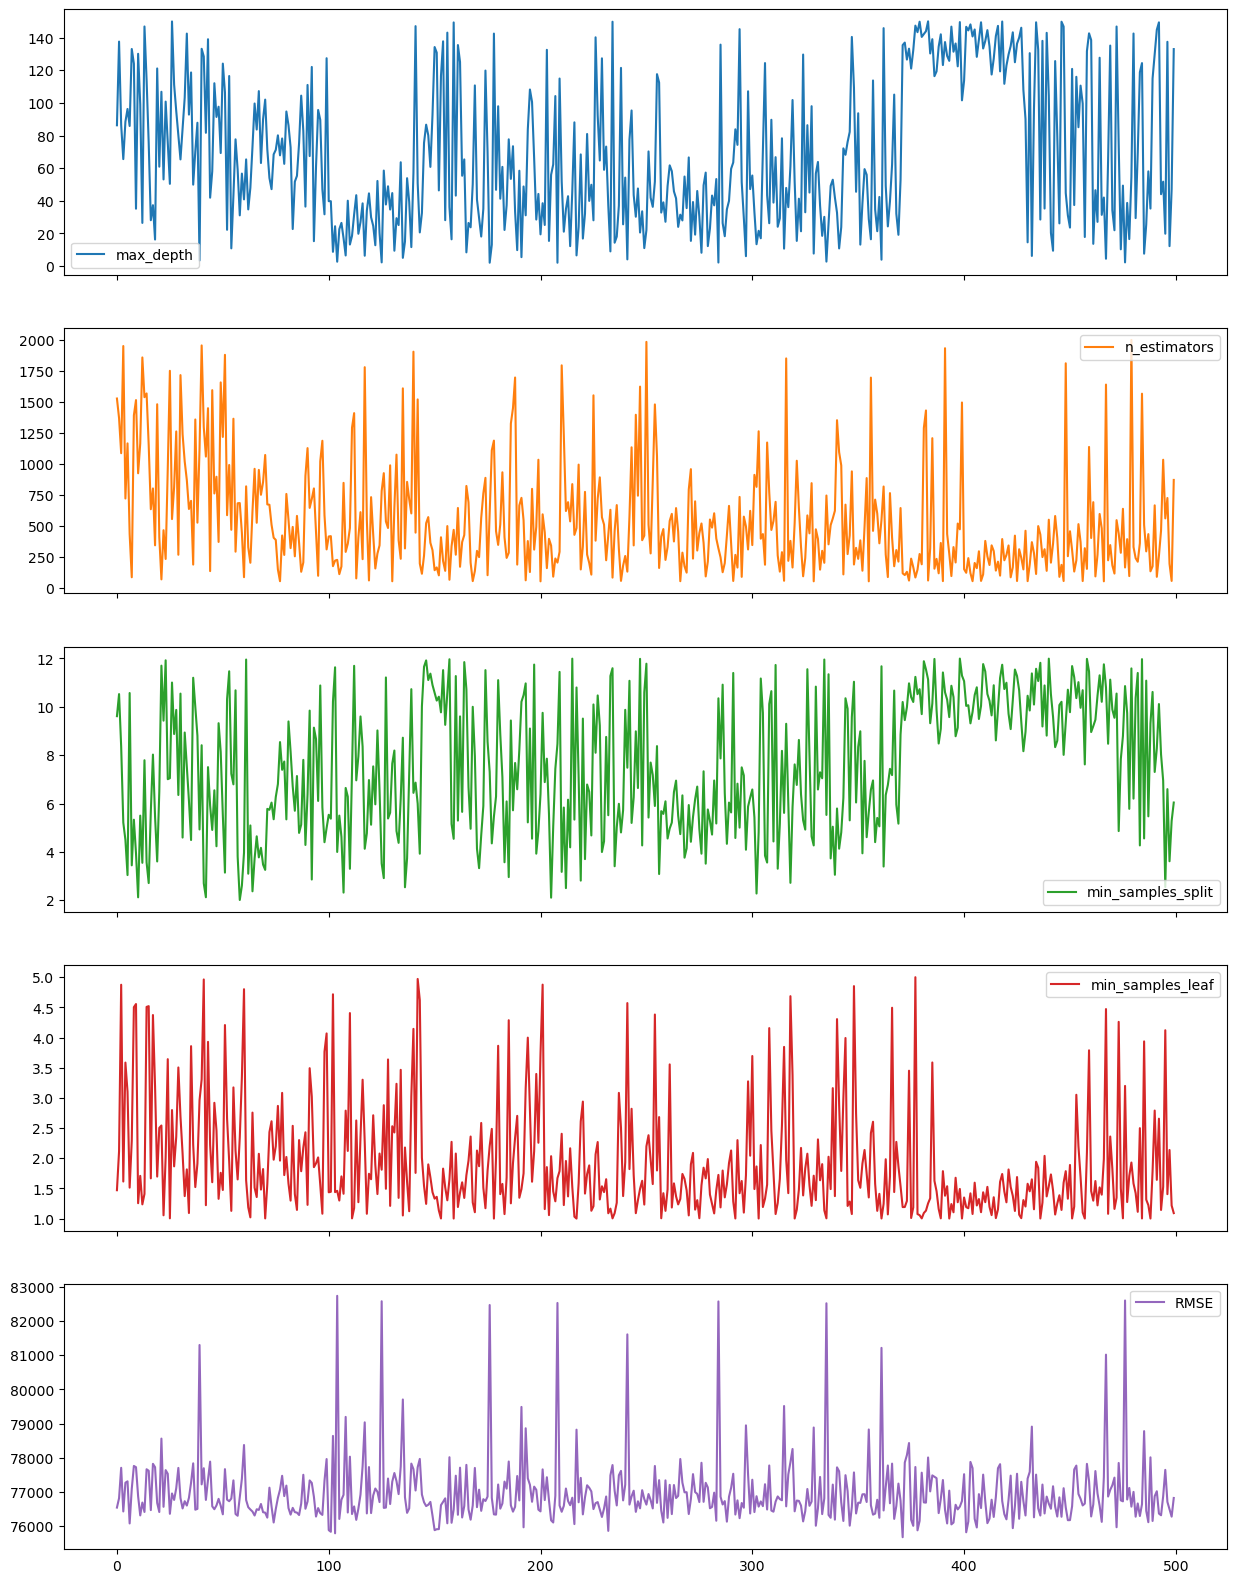

In [26]:
hyperopt_rfr[[
 'max_depth',
 'n_estimators',
 'min_samples_split',
 'min_samples_leaf',
 'RMSE']].plot(subplots=True,figsize=(15, 20))

# Use Customize code to get the performance of the model by volume breakdown

In [29]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import KBinsDiscretizer

class regressor_stratified_cv:
    def __init__(self,n_splits=10,n_repeats=5,group_count=10,random_state=37914,strategy='quantile'):
        self.group_count=group_count
        self.strategy=strategy
        self.cvkwargs=dict(n_splits=n_splits,n_repeats=n_repeats,random_state=random_state)
        self.cv=RepeatedStratifiedKFold(**self.cvkwargs)
        self.discretizer=KBinsDiscretizer(n_bins=self.group_count,encode='ordinal',strategy=self.strategy)  
            
    def split(self,X,y,groups=None):
        kgroups=self.discretizer.fit_transform(y[:,None])[:,0]
        return self.cv.split(X,kgroups,groups)
    
    def get_n_splits(self,X,y,groups=None):
        return self.cv.get_n_splits(X,y,groups)

In [30]:
 pd.Series(pd.qcut(model_data.ATT,3).value_counts())

(102.999, 18505.333]      1407
(18505.333, 49882.333]    1407
(49882.333, 1183616.0]    1407
Name: ATT, dtype: int64

In [31]:
import warnings
warnings.filterwarnings('ignore')
# Lets breakdown this results by volume bin
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_strategies.html
# Now we do 10fold cv for our NB:
#num_folds = 10
n_splits=10
n_repeats=10
group_count=10
kfold = regressor_stratified_cv(n_splits=n_splits,n_repeats=n_repeats,
        group_count=group_count,random_state=94704,strategy='quantile') #another option uniform

# Now we perform KFold:

fold_num = 1
rf_MAPE_train = []
rf_MAPE_scores = []
rf_RMSE_train = []
rf_RMSE_scores = []
rf_MAE_train = []
rf_MAE_scores = []
rf_R2_train = []
rf_R2_scores = []

rf_low_MAPE_scores = []
rf_low_RMSE_scores = []
rf_low_MAE_scores = []
rf_low_R2_scores = []

rf_med_MAPE_scores = []
rf_med_RMSE_scores = []
rf_med_MAE_scores = []
rf_med_R2_scores = []

rf_high_MAPE_scores = []
rf_high_RMSE_scores = []
rf_high_MAE_scores = []
rf_high_R2_scores = []
test_pred = []



# we split the entire dataframe:
for train, test in kfold.split(X_data, Y_data):
    rf_CV_model = RandomForestRegressor(random_state= 94704,n_estimators=115,max_depth=135,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',bootstrap=False).fit(X_data.iloc[train], Y_data.iloc[train])
    train_predictions = rf_CV_model.predict(X_data.iloc[train])
    test_predictions = rf_CV_model.predict(X_data.iloc[test])
    predictions_df = pd.DataFrame([X_data.iloc[test].index,rf_CV_model.predict(X_data.iloc[test]),Y_data.iloc[test]]).transpose()
    train_mape = mean_absolute_percentage_error(Y_data.iloc[train], train_predictions)
    rf_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(Y_data.iloc[test], test_predictions)
    rf_MAPE_scores.append(test_mape)
    train_rmse = math.sqrt(mean_squared_error(Y_data.iloc[train], train_predictions))
    rf_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(Y_data.iloc[test], test_predictions))
    rf_RMSE_scores.append(test_rmse)
    train_mae = mean_absolute_error(Y_data.iloc[train], train_predictions)
    rf_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(Y_data.iloc[test], test_predictions)
    rf_MAE_scores.append(test_mae)
    train_r2 = r2_score(Y_data.iloc[train], train_predictions)
    rf_R2_train.append(train_r2)
    score_r2 = r2_score(Y_data.iloc[test], test_predictions)
    rf_R2_scores.append(score_r2)
    test_pred.append(predictions_df)
    appended_data = pd.concat(test_pred)
    # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([Y_data.iloc[test] >= 0, Y_data.iloc[test] <=18505], axis=0)
    med_Y_test_mask = np.all([Y_data.iloc[test] >= 18506, Y_data.iloc[test] <=49882], axis=0)
    high_Y_test_mask = np.all([Y_data.iloc[test] >= 49883],axis=0)
   
    rf_low_MAPE_scores.append(mean_absolute_percentage_error(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask])))
    rf_low_RMSE_scores.append(math.sqrt(mean_squared_error(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask]))))
    rf_low_MAE_scores.append(mean_absolute_error(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask])))
    rf_low_R2_scores.append(r2_score(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask])))

    rf_med_MAPE_scores.append(mean_absolute_percentage_error(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))
    rf_med_RMSE_scores.append(math.sqrt(mean_squared_error(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask]))))
    rf_med_MAE_scores.append(mean_absolute_error(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))
    rf_med_R2_scores.append(r2_score(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))

    rf_high_MAPE_scores.append(mean_absolute_percentage_error(Y_data.iloc[test][high_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][high_Y_test_mask])))
    rf_high_RMSE_scores.append(math.sqrt(mean_squared_error(Y_data.iloc[test][high_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][high_Y_test_mask]))))
    rf_high_MAE_scores.append(mean_absolute_error(Y_data.iloc[test][high_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][high_Y_test_mask])))
    rf_high_R2_scores.append(r2_score(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))

    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={Y[test][low_Y_test_mask].shape[0]}), MED (n={Y[test][med_Y_test_mask].shape[0]}), HIGH (n={Y[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {rf_low_MAE_scores[-1]}\tMed Loss: {rf_med_MAE_scores[-1]}\tHigh Loss: {rf_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {rf_low_RMSE_scores[-1]}\tMed RMSE: {rf_med_RMSE_scores[-1]}\tHigh RMSE: {rf_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {rf_low_MAPE_scores[-1]}\tMed MAPE: {rf_med_MAPE_scores[-1]}\tHigh MAPE: {rf_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {rf_low_R2_scores[-1]}\tMed R2: {rf_med_R2_scores[-1]}\tHigh R2: {rf_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(rf_low_MAE_scores)} +/- {np.std(rf_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(rf_low_RMSE_scores)} +/- {np.std(rf_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(rf_low_MAPE_scores)} +/- {np.std(rf_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(rf_low_R2_scores)} +/- {np.std(rf_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(rf_med_MAE_scores)} +/- {np.std(rf_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(rf_med_RMSE_scores)} +/- {np.std(rf_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(rf_med_MAPE_scores)} +/- {np.std(rf_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(rf_med_R2_scores)} +/- {np.std(rf_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(rf_high_MAE_scores)} +/- {np.std(rf_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(rf_high_RMSE_scores)} +/- {np.std(rf_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(rf_high_MAPE_scores)} +/- {np.std(rf_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(rf_high_R2_scores)} +/- {np.std(rf_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(rf_MAE_scores)} +/- {np.std(rf_MAE_scores)}")
print(f"Overall RMSE: {np.mean(rf_RMSE_scores)} +/- {np.std(rf_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(rf_MAPE_scores)} +/- {np.std(rf_MAPE_scores)}")
print(f"Overall R2: {np.mean(rf_R2_scores)} +/- {np.std(rf_R2_scores)}\n\n")


print("Delimited table for linear Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 100):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (rf_MAPE_train[i], rf_MAPE_scores[i], rf_RMSE_train[i], rf_RMSE_scores[i], rf_MAE_train[i], rf_MAE_scores[i], rf_R2_train[i], rf_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(rf_MAPE_train), np.mean(rf_MAPE_scores), np.mean(rf_RMSE_train),
      np.mean(rf_RMSE_scores), np.mean(rf_MAE_train), np.mean(rf_MAE_scores), np.mean(rf_R2_train), np.mean(rf_R2_scores)))        

------------------------------------------Fold 1------------------------------------------
	Train MAE: 12429.688011106788	Score Loss: 23552.937887334057
	Train RMSE: 31589.869882623287	Score RMSE: 46756.22430205011
	Train MAPE: 46.40328174833167	Score MAPE: 101.26897222552715
	Train R2:   0.8990204298477846	Score R2: 0.6807543466791808

	3-VOLUME SCORES: LOW (n=138), MED (n=145), HIGH (n=140), TOTAL IN FOLD (n=423)
	Low Loss: 19452.878784869128	Med Loss: 12109.218346778993	High Loss: 39446.84852676723
	Low RMSE: 50419.56963300968	Med RMSE: 18074.944743746273	High RMSE: 61327.73480519849
	Low MAPE: 234.25951417466274	Med MAPE: 41.47322051353698	High MAPE: 32.10960943451193
	Low R2:   -142.18842095158465	Med R2: -2.9596572418892726	High R2: -2.9596572418892726
------------------------------------------Fold 2------------------------------------------
	Train MAE: 12100.39762506969	Score Loss: 27024.858836458545
	Train RMSE: 27464.149257187386	Score RMSE: 74320.64459982884
	Train MAPE: 44.5

------------------------------------------Fold 12------------------------------------------
	Train MAE: 12495.043986347431	Score Loss: 22796.936081036434
	Train RMSE: 31482.69686521038	Score RMSE: 46389.76768271907
	Train MAPE: 45.48716680366708	Score MAPE: 107.3240599491119
	Train R2:   0.8991146911832951	Score R2: 0.7071191442110737

	3-VOLUME SCORES: LOW (n=142), MED (n=147), HIGH (n=133), TOTAL IN FOLD (n=422)
	Low Loss: 17980.05004959709	Med Loss: 14134.068927362525	High Loss: 37514.52471302479
	Low RMSE: 48840.13789078058	Med RMSE: 23680.87982631394	High RMSE: 60511.11898370886
	Low MAPE: 243.01802074934199	Med MAPE: 47.05073179171648	High MAPE: 29.065690065686734
	Low R2:   -124.5524869545688	Med R2: -5.844284876942267	High R2: -5.844284876942267
------------------------------------------Fold 13------------------------------------------
	Train MAE: 12550.287907256841	Score Loss: 23405.880086912366
	Train RMSE: 32373.022501245716	Score RMSE: 41419.478838358154
	Train MAPE: 47.106

------------------------------------------Fold 23------------------------------------------
	Train MAE: 12235.725584228969	Score Loss: 25596.626119754106
	Train RMSE: 30002.414905494443	Score RMSE: 57126.76978950131
	Train MAPE: 42.40633856111029	Score MAPE: 113.90667307199578
	Train R2:   0.905042910340799	Score R2: 0.6883664043759097

	3-VOLUME SCORES: LOW (n=142), MED (n=138), HIGH (n=142), TOTAL IN FOLD (n=422)
	Low Loss: 13731.511266123312	Med Loss: 18280.922126854104	High Loss: 44571.368797470815
	Low RMSE: 20157.09962281658	Med RMSE: 36017.82832860964	High RMSE: 89618.22022297715
	Low MAPE: 243.37300447837654	Med MAPE: 62.213640087408415	High MAPE: 34.67723287598875
	Low R2:   -19.224299531220073	Med R2: -14.798490261264426	High R2: -14.798490261264426
------------------------------------------Fold 24------------------------------------------
	Train MAE: 12465.94890180682	Score Loss: 25507.12957788343
	Train RMSE: 32329.696344907283	Score RMSE: 47193.27064898174
	Train MAPE: 45.

------------------------------------------Fold 34------------------------------------------
	Train MAE: 12260.022253626004	Score Loss: 25319.555972120015
	Train RMSE: 30679.883690770977	Score RMSE: 54378.431817241886
	Train MAPE: 47.23567436445171	Score MAPE: 86.7559306073426
	Train R2:   0.8986298262309763	Score R2: 0.757865118546969

	3-VOLUME SCORES: LOW (n=142), MED (n=135), HIGH (n=145), TOTAL IN FOLD (n=422)
	Low Loss: 16107.954714203093	Med Loss: 13921.337014441633	High Loss: 44952.70726805645
	Low RMSE: 58133.13444565585	Med RMSE: 22091.752442437843	High RMSE: 69584.49043791433
	Low MAPE: 177.70254832774285	Med MAPE: 50.08382545400061	High MAPE: 31.83396149978633
	Low R2:   -180.1725830608692	Med R2: -5.250079294013727	High R2: -5.250079294013727
------------------------------------------Fold 35------------------------------------------
	Train MAE: 12441.511817175742	Score Loss: 24024.303162746655
	Train RMSE: 32353.948837420012	Score RMSE: 40471.26125876115
	Train MAPE: 46.708

------------------------------------------Fold 45------------------------------------------
	Train MAE: 12114.714517559469	Score Loss: 27349.050287843544
	Train RMSE: 28949.261166158016	Score RMSE: 66085.65913704307
	Train MAPE: 44.83053967698136	Score MAPE: 86.1982567236955
	Train R2:   0.9083576185420987	Score R2: 0.6757971144434014

	3-VOLUME SCORES: LOW (n=142), MED (n=137), HIGH (n=143), TOTAL IN FOLD (n=422)
	Low Loss: 14532.605206067323	Med Loss: 13011.945450474277	High Loss: 53811.41787058351
	Low RMSE: 22711.590439851305	Med RMSE: 19127.70298824712	High RMSE: 109660.52756409528
	Low MAPE: 177.57061721182347	Med MAPE: 42.796754938897244	High MAPE: 37.04532354329824
	Low R2:   -25.919862285565053	Med R2: -3.304557503055764	High R2: -3.304557503055764
------------------------------------------Fold 46------------------------------------------
	Train MAE: 12609.900765466047	Score Loss: 21587.635564901764
	Train RMSE: 32621.397341173903	Score RMSE: 35889.721399113914
	Train MAPE: 47

------------------------------------------Fold 56------------------------------------------
	Train MAE: 12433.069464517106	Score Loss: 25719.510806284117
	Train RMSE: 32051.959442359952	Score RMSE: 46405.377796218
	Train MAPE: 46.44467251337295	Score MAPE: 100.46111376488527
	Train R2:   0.8921604822403267	Score R2: 0.7856910780755347

	3-VOLUME SCORES: LOW (n=135), MED (n=145), HIGH (n=142), TOTAL IN FOLD (n=422)
	Low Loss: 15772.296585435675	Med Loss: 13391.887512981602	High Loss: 47764.43543546301
	Low RMSE: 22542.776494132355	Med RMSE: 21882.955962107226	High RMSE: 73672.31528692278
	Low MAPE: 228.1765692799428	Med MAPE: 44.84097377491224	High MAPE: 35.83670393399323
	Low R2:   -28.112852026961306	Med R2: -4.427618732938515	High R2: -4.427618732938515
------------------------------------------Fold 57------------------------------------------
	Train MAE: 12568.866605348725	Score Loss: 23629.68655988441
	Train RMSE: 31920.916967319128	Score RMSE: 44320.26879231866
	Train MAPE: 46.545

------------------------------------------Fold 67------------------------------------------
	Train MAE: 12461.537924941564	Score Loss: 22295.99256055001
	Train RMSE: 31659.092952345123	Score RMSE: 42777.90790385312
	Train MAPE: 47.49736680221339	Score MAPE: 86.87617545420291
	Train R2:   0.8961684542661372	Score R2: 0.7945981681905886

	3-VOLUME SCORES: LOW (n=135), MED (n=140), HIGH (n=147), TOTAL IN FOLD (n=422)
	Low Loss: 14756.27620542903	Med Loss: 14235.99197232081	High Loss: 36896.41290268212
	Low RMSE: 24481.922960685966	Med RMSE: 23683.337178640602	High RMSE: 64565.442720104365
	Low MAPE: 192.51989396029612	Med MAPE: 46.43196800383001	High MAPE: 28.37472677889419
	Low R2:   -33.63396099525284	Med R2: -6.155392986095391	High R2: -6.155392986095391
------------------------------------------Fold 68------------------------------------------
	Train MAE: 12194.945576185008	Score Loss: 26633.438485014998
	Train RMSE: 29505.746685639304	Score RMSE: 61240.047173716914
	Train MAPE: 44.45

------------------------------------------Fold 78------------------------------------------
	Train MAE: 12335.927348254263	Score Loss: 23562.876964870364
	Train RMSE: 31856.092408536664	Score RMSE: 45036.655049590074
	Train MAPE: 47.13972322625973	Score MAPE: 72.86648615116653
	Train R2:   0.8925301631760209	Score R2: 0.8121303409509801

	3-VOLUME SCORES: LOW (n=139), MED (n=147), HIGH (n=136), TOTAL IN FOLD (n=422)
	Low Loss: 12805.29824964873	Med Loss: 12795.532728036695	High Loss: 46195.98758421122
	Low RMSE: 21934.58515008807	Med RMSE: 20650.95781451301	High RMSE: 73082.15992895105
	Low MAPE: 142.53564127891246	Med MAPE: 43.8046057097369	High MAPE: 33.072985137442075
	Low R2:   -23.768696134355807	Med R2: -4.024532526212316	High R2: -4.024532526212316
------------------------------------------Fold 79------------------------------------------
	Train MAE: 12336.203081194772	Score Loss: 24315.8069663095
	Train RMSE: 31597.850737029294	Score RMSE: 45302.37843328905
	Train MAPE: 47.1305

------------------------------------------Fold 89------------------------------------------
	Train MAE: 12237.488827076828	Score Loss: 24803.087106535317
	Train RMSE: 28577.828878158085	Score RMSE: 61939.53157983098
	Train MAPE: 43.622662020398735	Score MAPE: 107.77999716996408
	Train R2:   0.9119480914894859	Score R2: 0.6881749022836012

	3-VOLUME SCORES: LOW (n=144), MED (n=134), HIGH (n=144), TOTAL IN FOLD (n=422)
	Low Loss: 16636.87066063281	Med Loss: 10940.46386630512	High Loss: 45869.244623207574
	Low RMSE: 32354.29163310239	Med RMSE: 14774.065426906798	High RMSE: 99965.88103174836
	Low MAPE: 250.35487966803746	Med MAPE: 37.735653106645	High MAPE: 30.385268175257085
	Low R2:   -48.55215461954701	Med R2: -1.8903047810597662	High R2: -1.8903047810597662
------------------------------------------Fold 90------------------------------------------
	Train MAE: 12512.68724684368	Score Loss: 24147.950201986005
	Train RMSE: 32545.811685125835	Score RMSE: 41500.15101081723
	Train MAPE: 44.3

------------------------------------------Fold 100------------------------------------------
	Train MAE: 12236.73336006479	Score Loss: 24169.973354904025
	Train RMSE: 30141.22459341199	Score RMSE: 51392.62503520591
	Train MAPE: 43.60346400228606	Score MAPE: 120.92898600694424
	Train R2:   0.9062321866912975	Score R2: 0.6924002710481503

	3-VOLUME SCORES: LOW (n=141), MED (n=139), HIGH (n=142), TOTAL IN FOLD (n=422)
	Low Loss: 19427.60074967329	Med Loss: 12099.120290351568	High Loss: 40694.78401201898
	Low RMSE: 55432.647298831	Med RMSE: 19276.43543203471	High RMSE: 66590.80948003205
	Low MAPE: 292.0974193261503	Med MAPE: 39.65835642306186	High MAPE: 30.519608641814557
	Low R2:   -148.67599148554686	Med R2: -3.6863098630321955	High R2: -3.6863098630321955


Low MAE Average: 15938.841036958062 +/- 2504.639521132239
Low RMSE Average: 33675.56009827312 +/- 16905.058732222216
Low MAPE Average: 214.2963986074543 +/- 40.93305912849879
Low R2 Average: -73.28489537601403 +/- 74.12036965307675



In [32]:
appended_data1=appended_data.rename(columns = {0:'Index_ID',1:'Mean Predicted ATT',2:'Observed ATT'})
appended_data2=appended_data1.groupby('Index_ID').mean()
graph_data=pd.merge(track,appended_data2,left_on='index', right_on='Index_ID', how="inner")
graph_data['Mean Predicted ATT in Million']=graph_data['Mean Predicted ATT']/1000000
graph_data['Observed ATT in Million']=graph_data['Observed ATT']/1000000
graph_data.head()

,tdg_id,Leg,county,year,ATT,index,Mean Predicted ATT,Observed ATT,Mean Predicted ATT in Million,Observed ATT in Million
0,208578,NaN,Alameda,2018,11376,0,118155.32,11376.00,0.12,0.01
1,221803,NaN,Alameda,2019,12785,1,62294.52,12785.00,0.06,0.01
2,221803,NaN,Alameda,2019,24424,2,56121.25,24424.00,0.06,0.02
3,214389,NaN,Alameda,2017,69539,3,66584.87,69539.00,0.07,0.07
4,214389,NaN,Alameda,2018,77973,4,62932.42,77973.00,0.06,0.08


In [33]:
graph_data['Mean Predicted ATT in Million'].max()

1.0357643734496205

In [34]:
graph_data['Observed ATT in Million'].max()

1.183616

In [35]:
graph_data.shape

(4221, 10)

In [36]:
graph_data['Observed ATT in Million'].max(), graph_data['Mean Predicted ATT in Million'].max()

(1.183616, 1.0357643734496205)

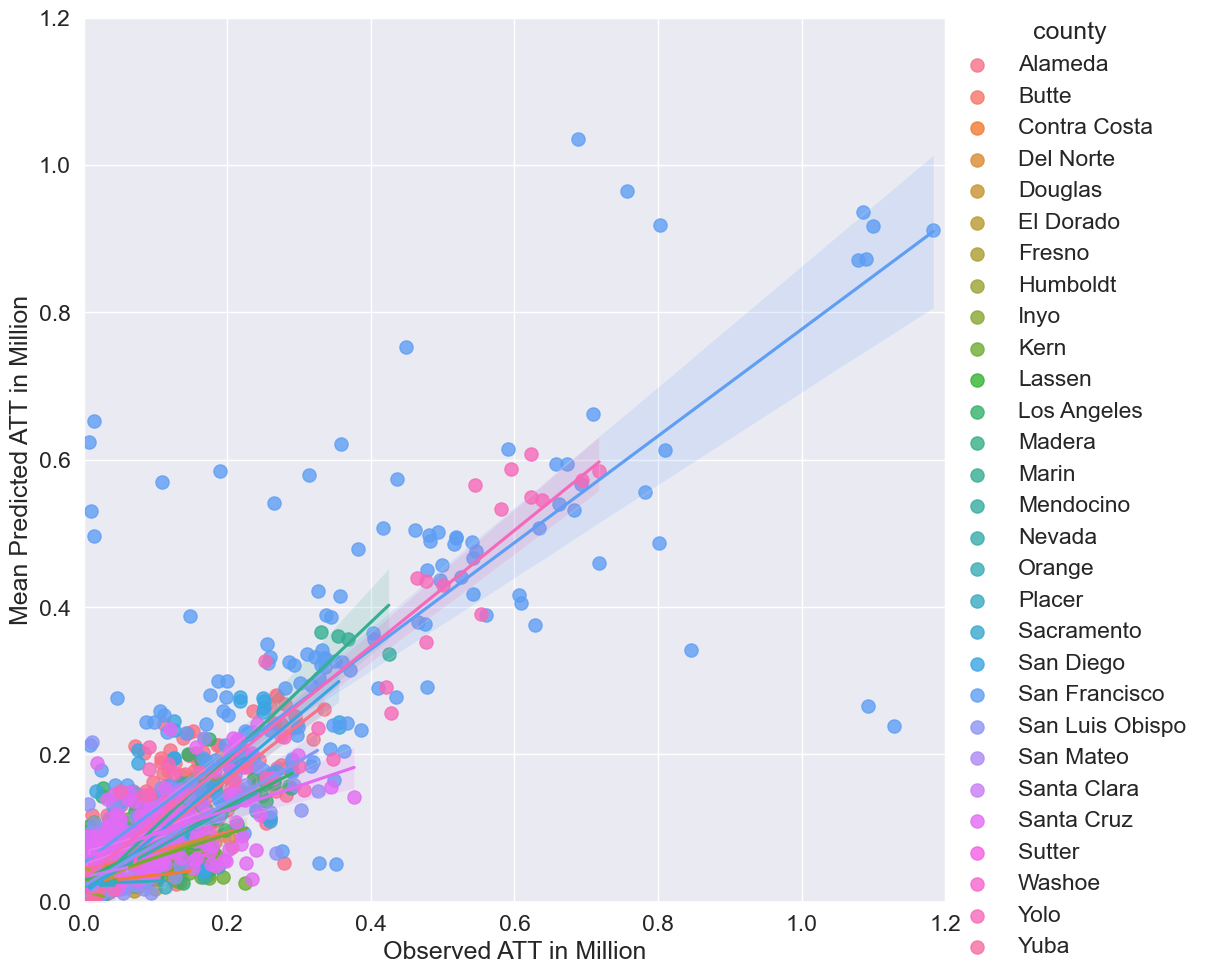

In [37]:
 sns.set(font_scale =1.5)
 g1=sns.lmplot(x="Observed ATT in Million", y="Mean Predicted ATT in Million", hue="county",data=graph_data,height=10, aspect=1.0,scatter_kws={"s": 90})
 plt.ticklabel_format(style='plain', axis='y')
#markers=["o", "x","*", "+","d", "X"]
 g2=g1.set(xlim=(0,1.20))
 g3=g2.set(ylim=(0,1.20))

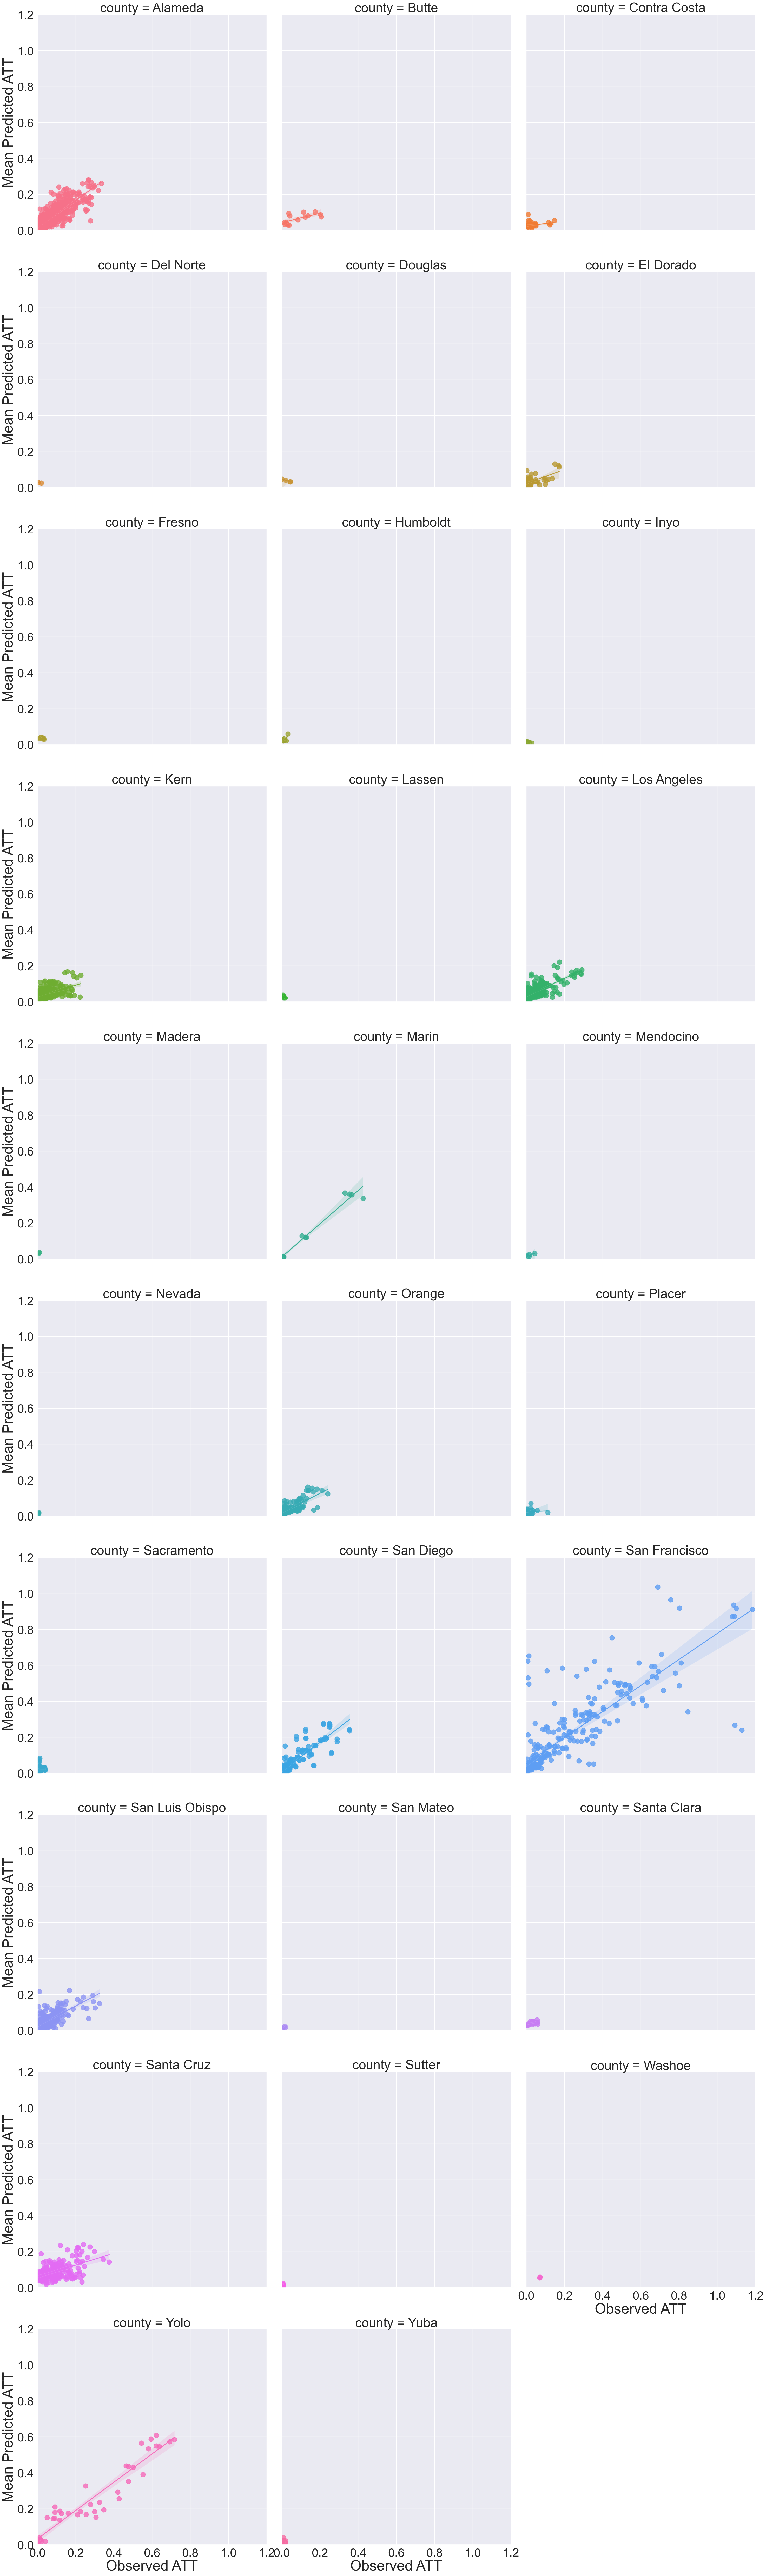

In [38]:
 sns.set(font_scale=3) 
 g3=sns.lmplot(x="Observed ATT in Million", y="Mean Predicted ATT in Million", col='county', hue="county", data=graph_data, col_wrap=3, height=10, aspect=1.0,scatter_kws={"s": 180},fit_reg=True)
 g31=g3.set_axis_labels("Observed ATT", "Mean Predicted ATT",size=40)
 g32=g31.set(xlim=(0,1.20))
 g33=g32.set(ylim=(0,1.20))

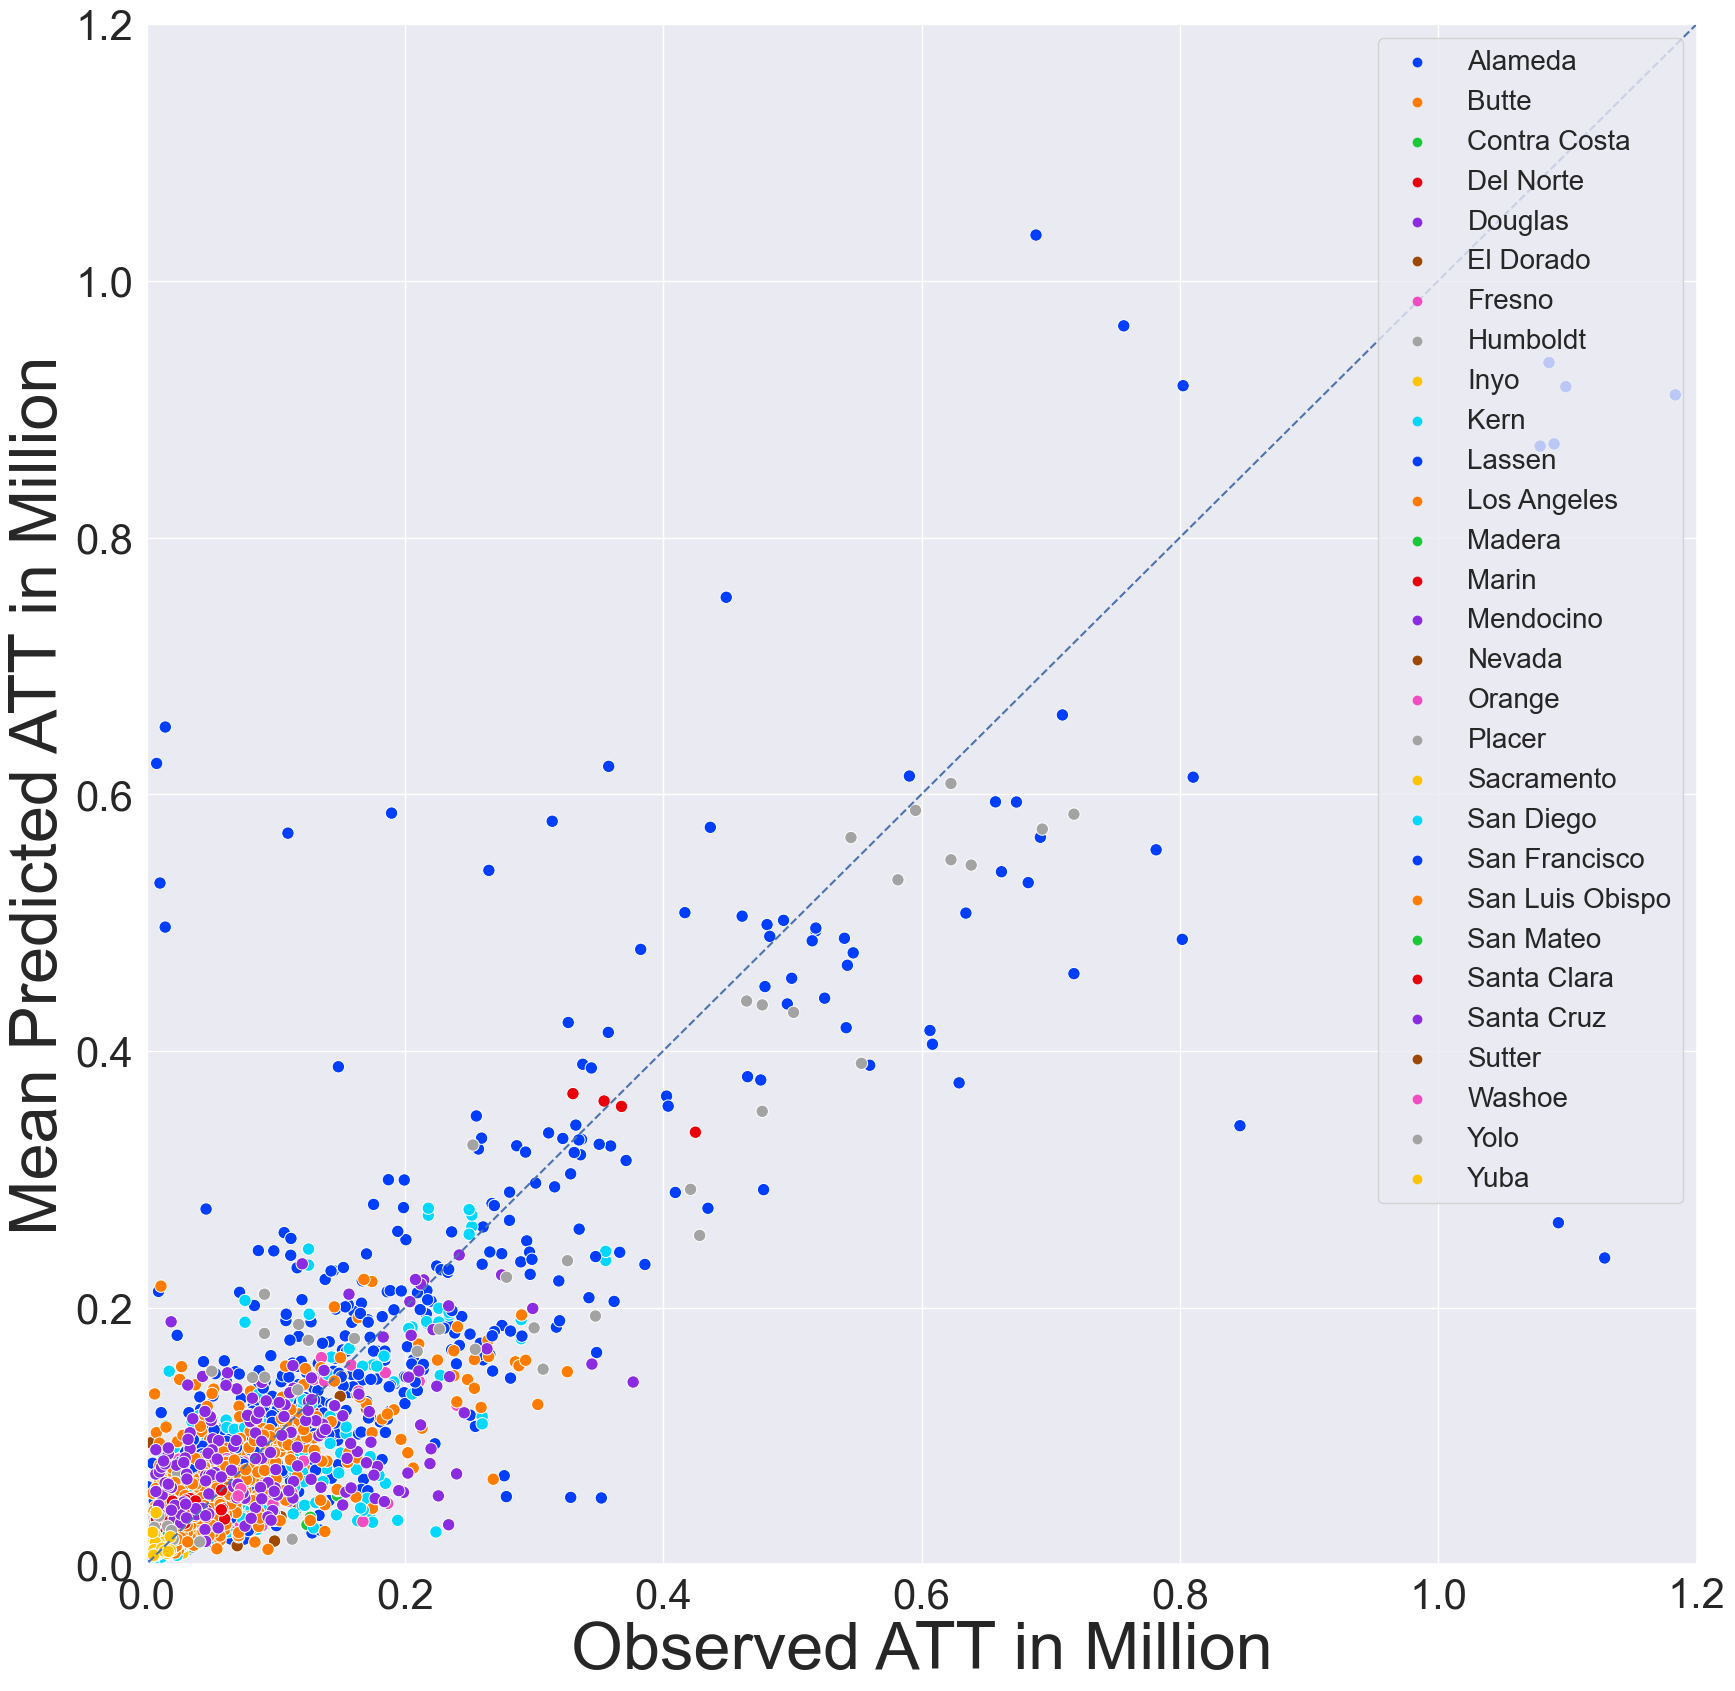

In [39]:
sns.set(font_scale=4) 
plt.figure(figsize=(20,20))
g=sns.scatterplot(data=graph_data, x="Observed ATT in Million", y="Mean Predicted ATT in Million", hue="county", palette="bright",s=80)
g.legend(fontsize=20)
abline(1, (0,0))
plt.xlim(0,1.20)
plt.ylim(0,1.20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [40]:
importances = list(rf_CV_model.feature_importances_)# List of tuples with variable and importance 
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
feature_importances

[('Stv_commute_adb', 0.1583),
 ('pctbiketowork_q', 0.081),
 ('totatleastbachelorspersqmi_h', 0.0738),
 ('Stv_leisure_adb', 0.0705),
 ('totnovehpersqmi_h', 0.0617),
 ('hshlddensitysqmi_h', 0.0534),
 ('popdensitysqmi_h', 0.0343),
 ('d3apo', 0.0339),
 ('dist_amtrak', 0.0328),
 ('dist_ferry', 0.0325),
 ('near_large_univ_miles', 0.0288),
 ('totwhitepersqmi_t', 0.0274),
 ('d5br', 0.0272),
 ('d3b', 0.025),
 ('d5be', 0.0239),
 ('dist_subway', 0.0228),
 ('d1a', 0.0209),
 ('pct_low_wage', 0.0202),
 ('pctlowintensity_h', 0.0185),
 ('Stv_Ave_speed', 0.0173),
 ('d3bpo4', 0.0166),
 ('dist_water', 0.0165),
 ('near_univ_miles', 0.016),
 ('exist_bike_parking_q', 0.0149),
 ('empnum_density_t', 0.0147),
 ('dist_busstop', 0.0129),
 ('slope', 0.0109),
 ('speed', 0.0065),
 ('Minor_Arterial', 0.0049),
 ('secondary', 0.0049),
 ('path', 0.0045),
 ('Principal_Arterial', 0.0032),
 ('Local', 0.0024),
 ('bike_route', 0.002),
 ('residential', 0.0015),
 ('bike_lane', 0.0015),
 ('tertiary', 0.0009),
 ('primary', 0.00

<AxesSubplot: xlabel='Variable', ylabel='Importance'>

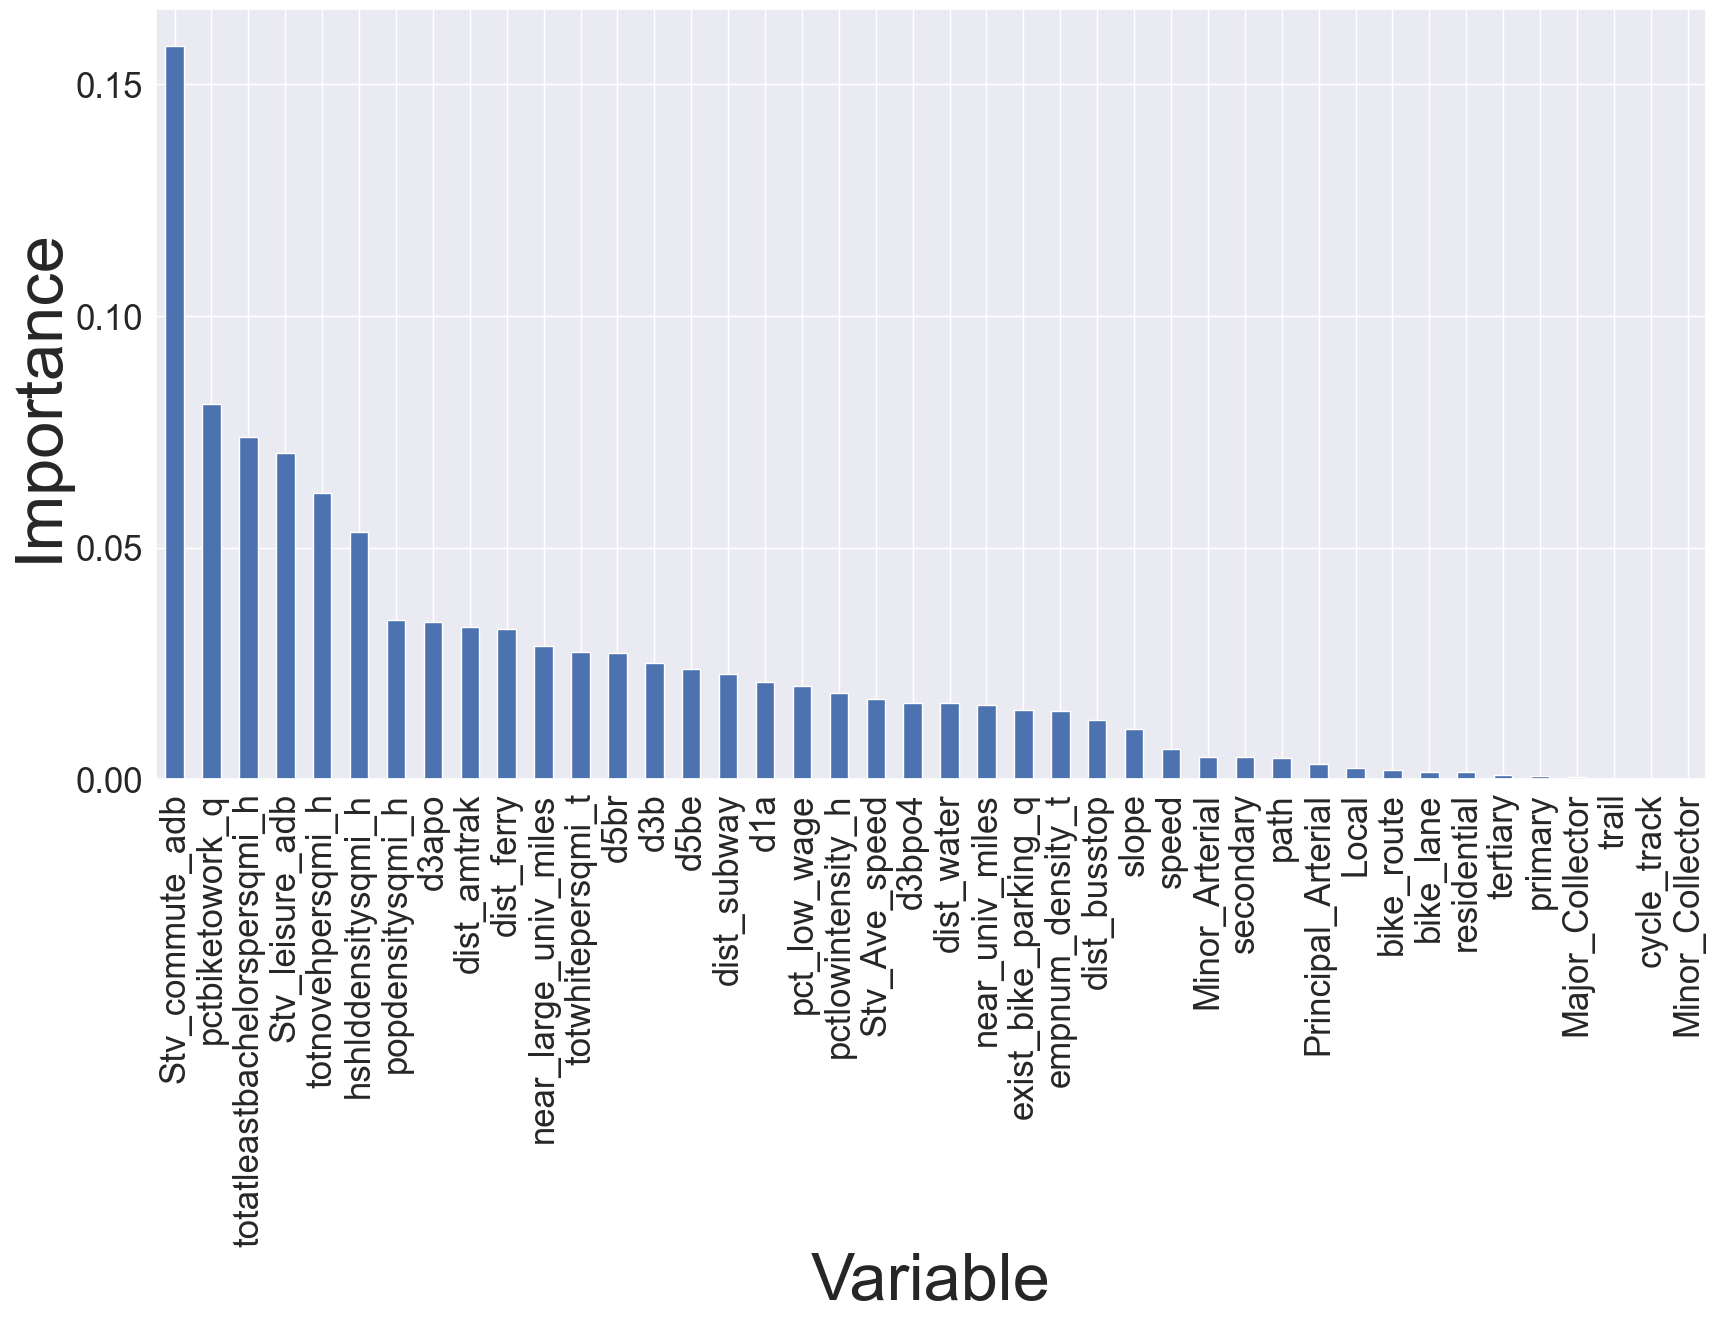

In [41]:
feature_importances_df = pd.DataFrame(rf_CV_model.feature_importances_, index=X_data.columns, columns=[
                                      'Importance']).sort_values('Importance', ascending=False)
feature_importances_df.plot(kind='bar', figsize=(20, 10), style='fivethirtyeight', fontsize=25, legend=False,
                          ylabel="Importance", xlabel="Variable")


In [42]:
feature_importances_df

,Importance
Stv_commute_adb,0.16
pctbiketowork_q,0.08
totatleastbachelorspersqmi_h,0.07
Stv_leisure_adb,0.07
totnovehpersqmi_h,0.06
hshlddensitysqmi_h,0.05
popdensitysqmi_h,0.03
d3apo,0.03
dist_amtrak,0.03
dist_ferry,0.03


# End of the Modeling

In [43]:
# Plot Poisson Regression Prediction
pdata=pd.read_csv('D:/Bike Exposure/Modeling/Poisson_Regression_model_outcomes_july11.csv')
pdata.head()

,Unnamed: 0,tdg_id,year,Leg,county,Lat,Long,geometry,obs,rowIndex,pred
0,1,200671,2016,NaN,San Francisco,37.79,-122.46,LINESTRING (547596.1582000004 4182777.31870000...,11376,1,81277.70
1,2,200671,2017,NaN,San Francisco,37.79,-122.46,LINESTRING (547596.1582000004 4182777.31870000...,12785,2,67525.33
2,3,200671,2018,NaN,San Francisco,37.79,-122.46,LINESTRING (547596.1582000004 4182777.31870000...,24424,3,68733.53
3,4,200671,2019,NaN,San Francisco,37.79,-122.46,LINESTRING (547596.1582000004 4182777.31870000...,69539,4,12184.36
4,5,201127,2016,NaN,San Francisco,37.80,-122.42,LINESTRING (551109.0690000001 4183354.03250000...,77973,5,12040.98


In [48]:
pdata=pdata.sort_values('county')
pdata.head()

,Unnamed: 0,tdg_id,year,Leg,county,Lat,Long,geometry,obs,rowIndex,pred,Mean Predicted ATT in Million,Observed ATT in Million
2080,2081,155328,2016,S,Alameda,37.53,-122.05,LINESTRING (583788.5015000002 4153597.56609999...,44404,2126,38436.68,0.04,0.04
3319,3320,156283,2018,N,Alameda,37.77,-122.18,LINESTRING (572519.8255000003 4180197.66139999...,76512,3369,122950.39,0.12,0.08
3320,3321,156422,2018,N,Alameda,37.79,-122.20,"LINESTRING (570591.5614 4182943.183599999, 570...",74942,3370,122989.97,0.12,0.07
3321,3322,156469,2018,N,Alameda,37.77,-122.20,LINESTRING (570169.6793999998 4180702.07220000...,87556,3371,67386.97,0.07,0.09
3322,3323,156482,2018,N,Alameda,37.76,-122.20,LINESTRING (570015.3130999999 4179540.12319999...,80403,3372,67285.51,0.07,0.08


In [49]:
pdata['Mean Predicted ATT in Million']=pdata['pred']/1000000
pdata['Observed ATT in Million']=pdata['obs']/1000000

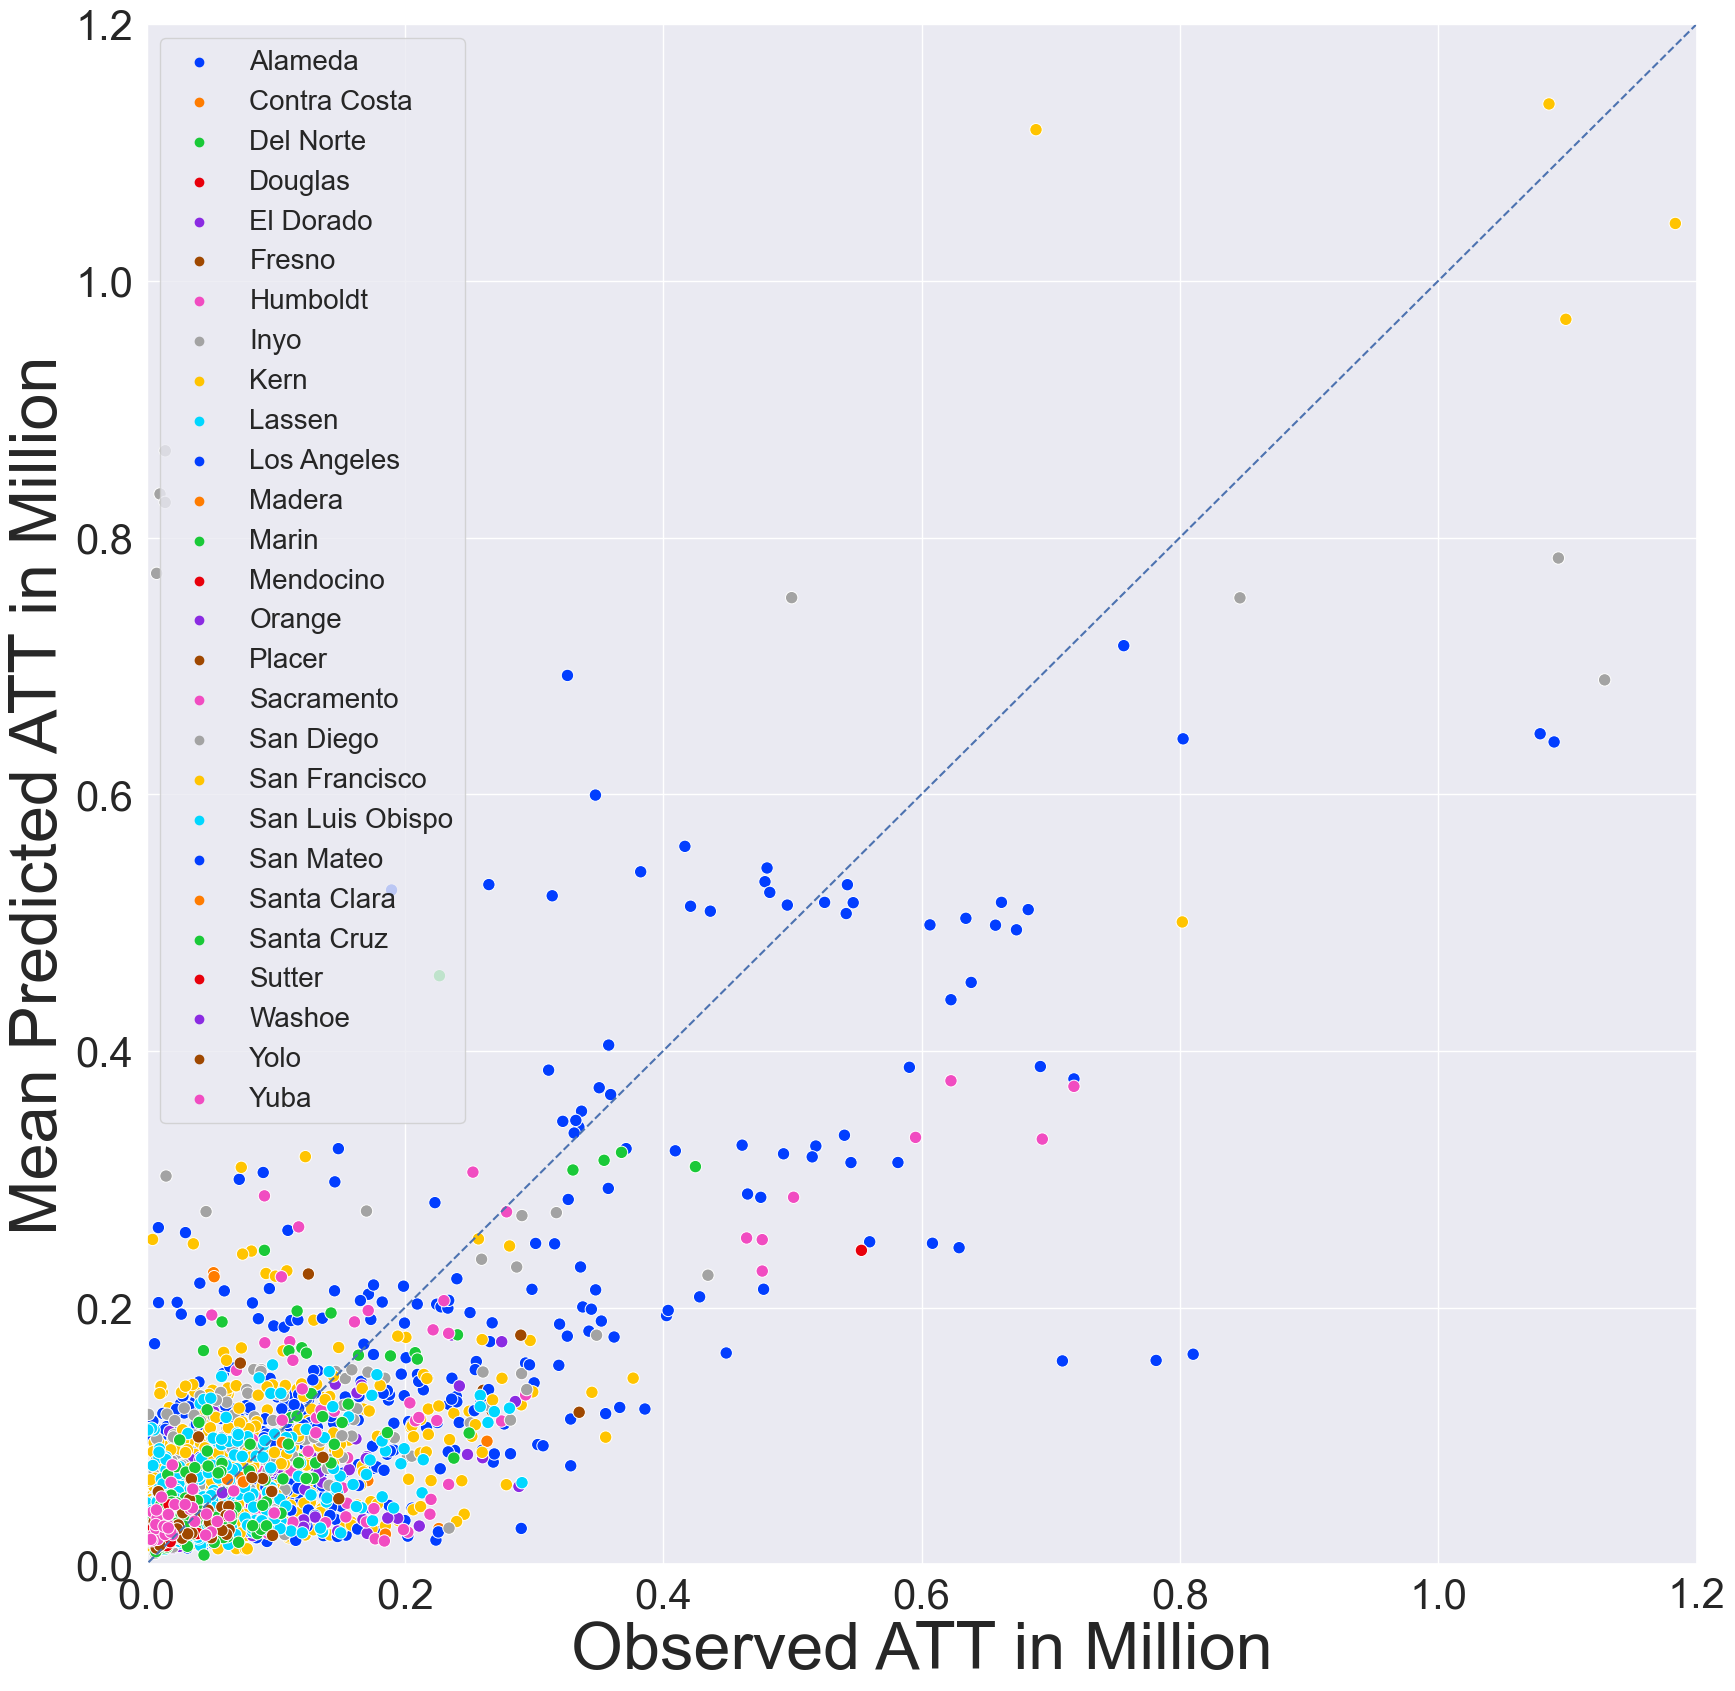

In [50]:
sns.set(font_scale=4) 
plt.figure(figsize=(20,20))
g=sns.scatterplot(data=pdata, x="Observed ATT in Million", y="Mean Predicted ATT in Million", hue="county", palette="bright",s=80)
g.legend(fontsize=20)
abline(1, (0,0))
plt.xlim(0,1.20)
plt.ylim(0,1.20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [46]:
list(pdata.columns)

['Unnamed: 0',
 'tdg_id',
 'year',
 'Leg',
 'county',
 'Lat',
 'Long',
 'geometry',
 'obs',
 'rowIndex',
 'pred',
 'Mean Predicted ATT in Million',
 'Observed ATT in Million']

# Apply RF Model to SHS

In [64]:
shs=pd.read_csv("D:/Bike Exposure/Modeling/SHS_application_data_july12.csv")
#shs=shs.loc[shs['year']==2019]
shs1=shs[['Stv_commute_adb', 'Stv_leisure_adb', 'Stv_Ave_speed','pctbiketowork_q',
                     'totatleastbachelorspersqmi_h','totnovehpersqmi_h','hshlddensitysqmi_h','popdensitysqmi_h','totwhitepersqmi_t',
                     'tertiary','speed', 'slope', 'empnum_density_t','Principal_Arterial', 'Minor_Arterial', 
                     'Major_Collector','Minor_Collector', 'Local','near_univ_miles', 'near_large_univ_miles','primary','secondary', 'residential','path',
       'bike_lane', 'bike_route', 'cycle_track', 'trail','dist_subway', 'dist_amtrak', 'dist_busstop',
 'dist_ferry','exist_bike_parking_q','pctlowintensity_h','pct_low_wage','dist_water','d1a','d3apo','d3b', 'd3bpo4','d5br',
 'd5be']]
shs1.head()

,Stv_commute_adb,Stv_leisure_adb,Stv_Ave_speed,pctbiketowork_q,totatleastbachelorspersqmi_h,totnovehpersqmi_h,hshlddensitysqmi_h,popdensitysqmi_h,totwhitepersqmi_t,tertiary,...,exist_bike_parking_q,pctlowintensity_h,pct_low_wage,dist_water,d1a,d3apo,d3b,d3bpo4,d5br,d5be
0,0.00,0.00,0.00,0.00,3.20,0.23,8.28,18.52,12.17,0,...,0.00,0.00,0.26,0.13,0.02,0.32,1.41,0.00,-99999.00,-99999.00
1,0.03,2.10,13.19,0.00,3.20,0.23,8.28,18.52,12.17,0,...,0.00,0.00,0.26,0.12,0.02,0.32,1.41,0.00,-99999.00,-99999.00
2,0.00,0.00,0.00,0.00,3.20,0.23,8.28,18.52,12.17,0,...,0.00,0.00,0.26,0.13,0.02,0.32,1.41,0.00,-99999.00,-99999.00
3,0.03,2.12,12.39,0.00,3.20,0.23,8.28,18.52,12.17,0,...,0.00,0.00,0.26,0.08,0.02,0.32,1.41,0.00,-99999.00,-99999.00
4,0.00,0.03,3.84,0.00,3.20,0.23,8.28,18.52,12.17,0,...,0.00,0.00,0.26,0.05,0.02,0.32,1.41,0.00,-99999.00,-99999.00


In [65]:
shs1.shape

(87550, 42)

In [66]:
shs1=shs1.fillna(0)

In [67]:
shs.shape

(87550, 198)

In [68]:
shs_track=shs[['tdg_id','county']].reset_index()
shs_track['index']=shs_track.index
shs_track.head()

,index,tdg_id,county
0,0,6496.00,Del Norte
1,1,6497.00,Del Norte
2,2,6498.00,Del Norte
3,3,6500.00,Del Norte
4,4,6507.00,Del Norte


In [69]:
shs_pred = np.asarray(shs1)

In [70]:
shs_predictions = rf_CV_model.predict(shs_pred)
shs_predictions_df = pd.DataFrame(shs_predictions,columns=['ATT'])
shs_predictions_df['index']=shs_predictions_df.index
shs_prediction=pd.merge(shs_predictions_df,shs_track,on=['index'], how='inner')
shs_prediction.head()

,ATT,index,tdg_id,county
0,24993.14,0,6496.00,Del Norte
1,24857.26,1,6497.00,Del Norte
2,24874.30,2,6498.00,Del Norte
3,25003.70,3,6500.00,Del Norte
4,26540.64,4,6507.00,Del Norte


In [71]:
shs_prediction.shape

(87550, 4)

In [72]:
shs_prediction['AADB']=shs_prediction['ATT']/365
shs_prediction['AADB'].describe()

count   87550.00
mean      106.17
std        75.68
min         7.81
25%        68.37
50%        85.70
75%       113.44
max      2721.70
Name: AADB, dtype: float64

In [73]:
shs_prediction['ATT'].describe()

count    87550.00
mean     38750.23
std      27624.00
min       2849.59
25%      24954.64
50%      31280.21
75%      41405.84
max     993421.29
Name: ATT, dtype: float64

In [75]:
shs_prediction.head()

,ATT,index,tdg_id,county,AADB
0,24993.14,0,6496.00,Del Norte,68.47
1,24857.26,1,6497.00,Del Norte,68.10
2,24874.30,2,6498.00,Del Norte,68.15
3,25003.70,3,6500.00,Del Norte,68.50
4,26540.64,4,6507.00,Del Norte,72.71


In [82]:
shs_prediction.to_csv("D:/Bike Exposure/Modeling/SHS_estimated_ATT_july12_2019.csv")

In [ ]:
#!pip install pyogrio

In [ ]:
# end of the coding